In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

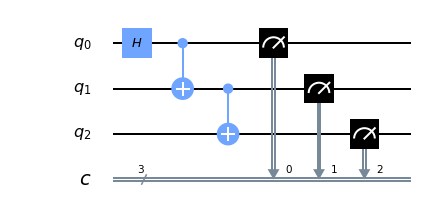

In [2]:
c = QuantumCircuit(3,3)
c.h(0)
c.cx(0,1)
c.cx(1,2)
c.measure([0,1,2],[0,1,2])
c.draw(output='mpl')

In [3]:
sim = Aer.get_backend('qasm_simulator')
res = execute(c, backend = sim, shots = 1024).result()

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
qcomp = provider.get_backend('ibmqx2')
job = execute(c, backend=qcomp, shots = 1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (1)     

In [ ]:
qres = job.result()
counts = qres.get_counts()
#print(counts)
plot_histogram([qres.get_counts(c), res.get_counts(c)], legend=['Device', 'Simulator'])

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr = c.qregs[0], circlabel = 'measerrormitcal')

In [ ]:
cal_circuits[2].draw(output='mpl')

In [ ]:
cal_job = execute(cal_circuits,
                 backend = qcomp,
                 shots = 1024,
                 optimization_level = 0,
                 )
job_monitor(cal_job)
calres = cal_job.result()

In [ ]:
plot_histogram(
calres.get_counts(cal_circuits[3])
)

In [ ]:
meas_fitter = CompleteMeasFitter(calres, state_labels)

In [ ]:
meas_fitter.plot_calibration()

In [ ]:
meas_filter = meas_fitter.filter

In [ ]:
mitres = meas_filter.apply(qres)

In [ ]:
qcounts = qres.get_counts(c)
mitcounts = mitres.get_counts(c)
plot_histogram([qcounts, mitcounts], legend = ['noisy results', 'mitigated results'])